<a href="https://www.kaggle.com/code/mesutssmn/crab-age-predicion-with-some-ml-models?scriptVersionId=132846238" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e16/sample_submission.csv
/kaggle/input/playground-series-s3e16/train.csv
/kaggle/input/playground-series-s3e16/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from tabulate import tabulate
from sklearn.svm import SVR

In [3]:
df = pd.read_csv('/kaggle/input/playground-series-s3e16/train.csv')

In [4]:
dftest = pd.read_csv('/kaggle/input/playground-series-s3e16/test.csv')

In [5]:
dfsample = pd.read_csv('/kaggle/input/playground-series-s3e16/sample_submission.csv')

In [6]:
dftest.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [7]:
df.tail()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
74046,74046,F,1.6625,1.2625,0.4375,50.660556,20.680960,10.361742,12.332033,10
74047,74047,I,1.0750,0.8625,0.2750,10.446791,4.323299,2.296310,3.543687,6
74048,74048,F,1.4875,1.2000,0.4125,29.483480,12.303683,7.540967,8.079607,10
74049,74049,I,1.2125,0.9625,0.3125,16.768729,8.972617,2.919999,4.280774,8
74050,74050,I,0.9125,0.6750,0.2000,5.386405,2.055339,1.034757,1.700970,6


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [9]:
df.isna().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [10]:
df['Sex'].unique()

array(['I', 'M', 'F'], dtype=object)

In [11]:
df['Sex'].value_counts()

M    27084
I    23957
F    23010
Name: Sex, dtype: int64

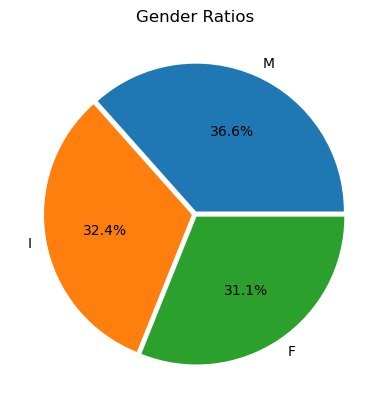

In [12]:
plt.pie(df['Sex'].value_counts().values,labels=df['Sex'].value_counts().index,autopct="%1.1f%%",explode = (0.02, 0.02, 0.02))
plt.title('Gender Ratios')
plt.show()

In [13]:
df.groupby('Sex')['Age'].mean()

Sex
F    11.341547
I     7.599073
M    10.895953
Name: Age, dtype: float64

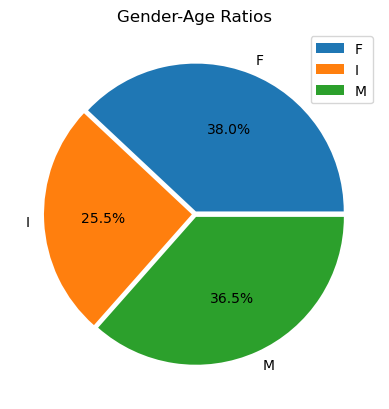

In [14]:
plt.pie(df.groupby('Sex')['Age'].mean().values,labels=df.groupby('Sex')['Age'].mean().index,autopct="%1.1f%%",explode = (0.02, 0.02, 0.02))
plt.title('Gender-Age Ratios')
plt.legend()
plt.show()

<BarContainer object of 3 artists>

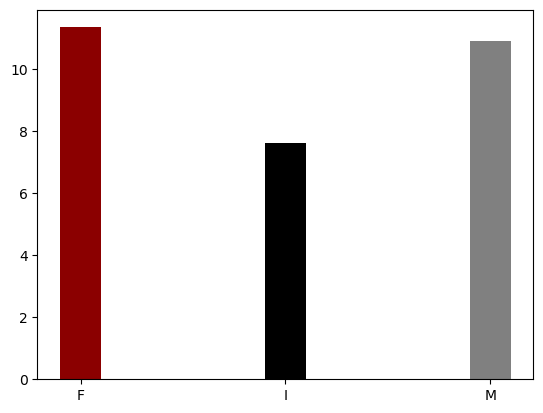

In [15]:
plt.bar(data=df,x=df.groupby('Sex')['Age'].mean().index,height=df.groupby('Sex')['Age'].mean().values,color=['darkred','black','grey'],width=0.2)

<Axes: xlabel='Age', ylabel='Count'>

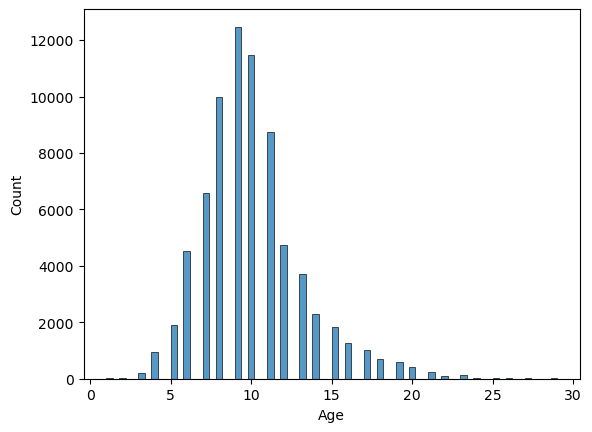

In [16]:
sns.histplot(data=df, x='Age',bins=70)

/tmp/ipykernel_20/4144087453.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['Length'],df['Diameter'], alpha = 1,cmap='Blues',edgecolors='darkblue')


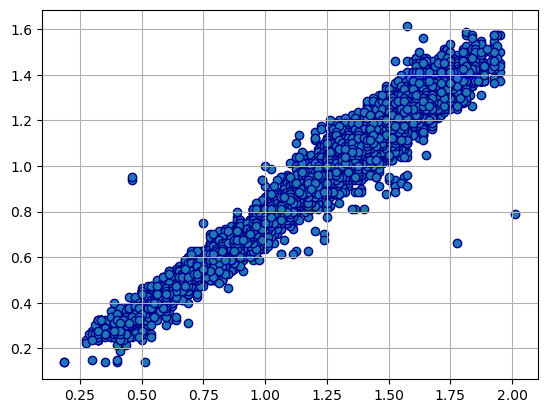

In [17]:
plt.scatter(df['Length'],df['Diameter'], alpha = 1,cmap='Blues',edgecolors='darkblue')
plt.grid()
plt.show()

/tmp/ipykernel_20/3645194275.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['Height'],df['Weight'], alpha = 1,cmap='Blues',edgecolors='darkblue')


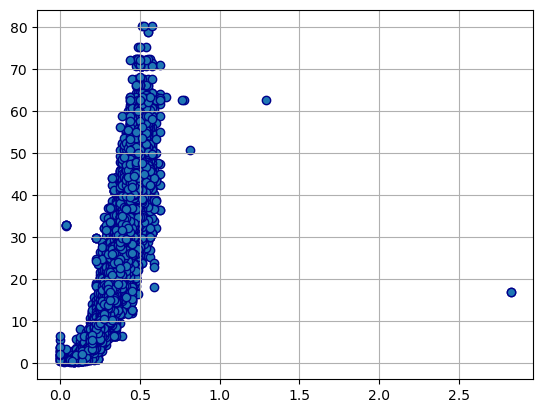

In [18]:
plt.scatter(df['Height'],df['Weight'], alpha = 1,cmap='Blues',edgecolors='darkblue')
plt.grid()
plt.show()

## Detection of Outliers

<Axes: xlabel='Sex', ylabel='Age'>

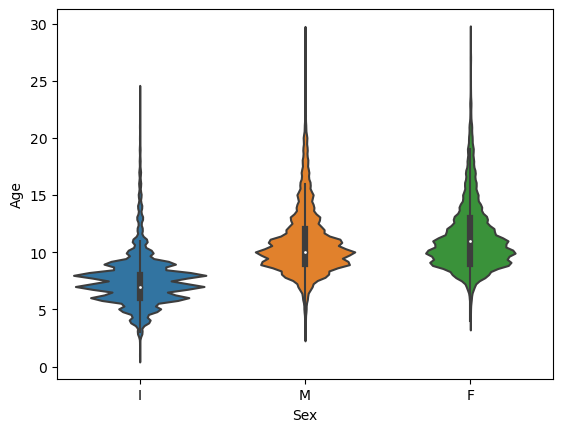

In [19]:
sns.violinplot(data=df,x='Sex',y='Age')

<Axes: >

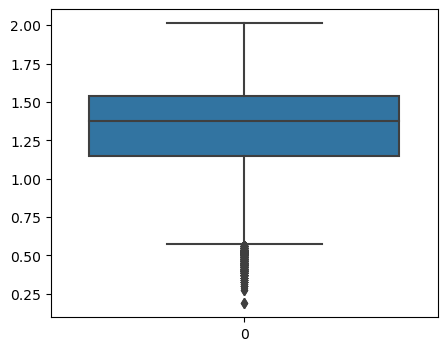

In [20]:
plt.figure(figsize=(5,4))
sns.boxplot(df['Length'])

<Axes: >

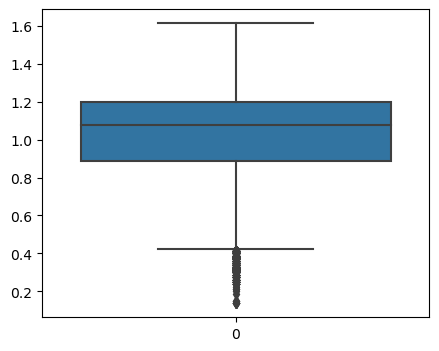

In [21]:
plt.figure(figsize=(5,4))
sns.boxplot(df['Diameter'])

<Axes: >

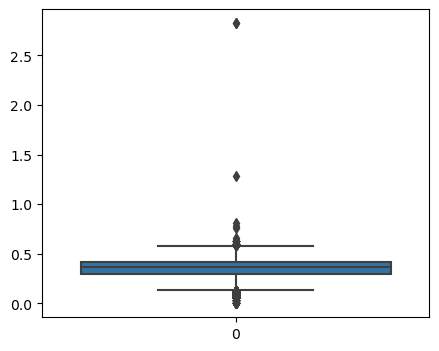

In [22]:
plt.figure(figsize=(5,4))
sns.boxplot(df['Height'])

<Axes: >

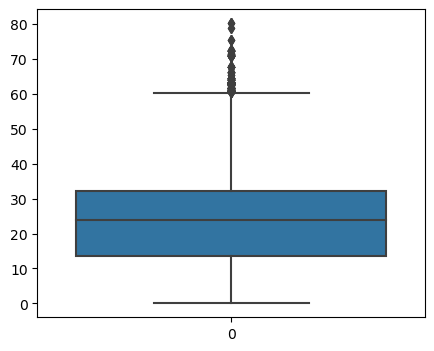

In [23]:
plt.figure(figsize=(5,4))
sns.boxplot(df['Weight'])

<Axes: >

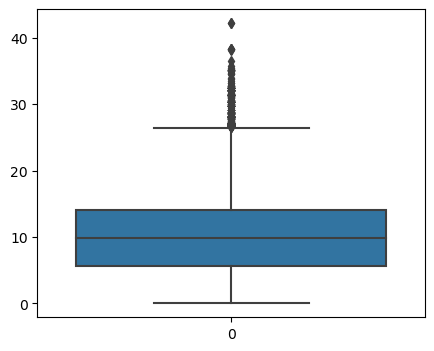

In [24]:
plt.figure(figsize=(5,4))
sns.boxplot(df['Shucked Weight'])

<Axes: >

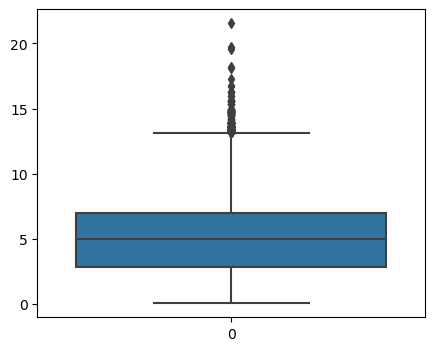

In [25]:
plt.figure(figsize=(5,4))
sns.boxplot(df['Viscera Weight'])

<Axes: >

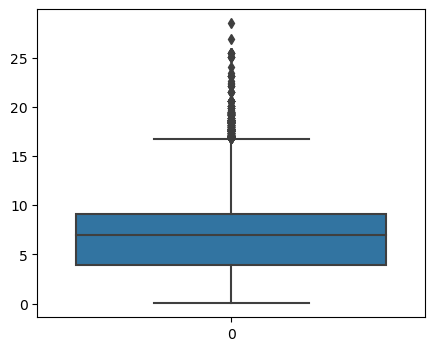

In [26]:
plt.figure(figsize=(5,4))
sns.boxplot(df['Shell Weight'])

In [27]:
df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


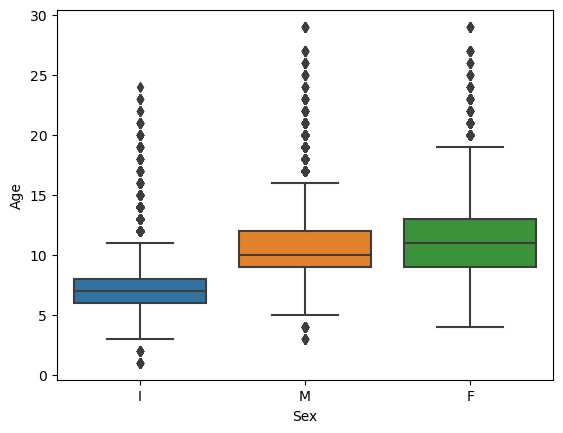

In [28]:
sns.boxplot(df, x='Sex', y='Age')
plt.show()

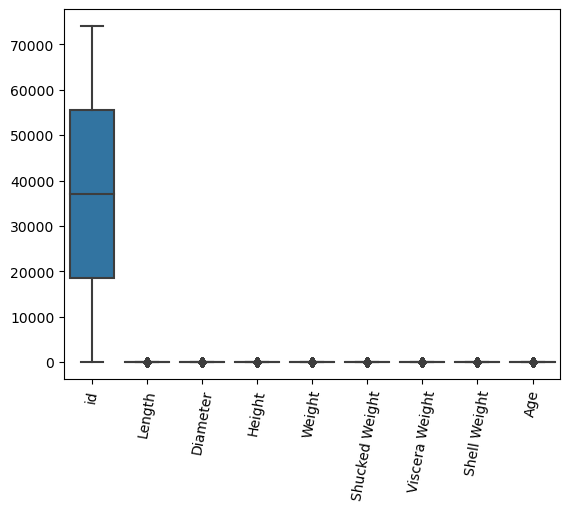

In [29]:
sns.boxplot(df)
plt.xticks(rotation=80)
plt.show()

In [30]:
df.drop('id',axis=1,inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             74051 non-null  object 
 1   Length          74051 non-null  float64
 2   Diameter        74051 non-null  float64
 3   Height          74051 non-null  float64
 4   Weight          74051 non-null  float64
 5   Shucked Weight  74051 non-null  float64
 6   Viscera Weight  74051 non-null  float64
 7   Shell Weight    74051 non-null  float64
 8   Age             74051 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 5.1+ MB


## Corelation Map

/tmp/ipykernel_20/1449592614.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap = 'magma', annot = True, annot_kws = {'size' : 8})


<Axes: >

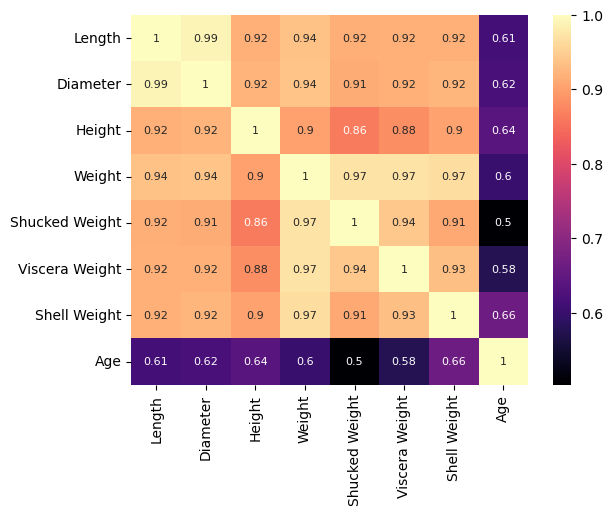

In [32]:
sns.heatmap(df.corr(),cmap = 'magma', annot = True, annot_kws = {'size' : 8})

## Convert categorical variable to dummy variables.

In [33]:
dfd = pd.get_dummies(df, columns=['Sex'],drop_first=True)

## Divide Dummy DF to Dependent and İndependent Variables

In [34]:
y = dfd['Age']
x = dfd.drop('Age',axis=1)

## Training variables for regression

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## Regression Models

In [36]:
reg1 = LinearRegression()
model1 = reg1.fit(x_train,y_train)
pred1 = model1.predict(x_test)
model1.score(x_test,y_test)

0.5569811816792245

In [37]:
reg2 = RandomForestRegressor()
model2 = reg2.fit(x_train,y_train)
pred2 = model2.predict(x_test)
model2.score(x_test,y_test)

0.5691063772124632

In [38]:
reg3 = KNeighborsRegressor(n_neighbors=6)
model3 = reg3.fit(x_train,y_train)
pred3 = model3.predict(x_test)
model3.score(x_test,y_test)

0.530786378792033

In [39]:
reg4 = DecisionTreeRegressor(criterion="squared_error", max_depth = 7)
model4 =reg4.fit(x_train,y_train)
model4.score(x_test,y_test)

0.5639530672047874

In [40]:
reg5=XGBRegressor(n_estimators=970,learning_rate=0.01,random_state=42)
model5 = reg5.fit(x_train,y_train)
model5.score(x_test,y_test)

0.5937123158199071

In [41]:
'''ss = StandardScaler()
X_train = ss.fit_transform(x_train)
X_test = ss.fit_transform(x_test)'''

'ss = StandardScaler()\nX_train = ss.fit_transform(x_train)\nX_test = ss.fit_transform(x_test)'

In [42]:
mms = MinMaxScaler()
X_train = mms.fit_transform(x_train)
X_test = mms.transform(x_test)

In [43]:
regss1 = LinearRegression()
modelss1 = regss1.fit(X_train,y_train)
predss1 = modelss1.predict(X_test)
modelss1.score(X_test,y_test)

0.5569811816792245

In [44]:
regss2 = RandomForestRegressor()
modelss2 = regss2.fit(X_train,y_train)
predss2 = modelss2.predict(X_test)
modelss2.score(X_test,y_test)

0.568251686849192

In [45]:
regss3 = KNeighborsRegressor(n_neighbors=6)
modelss3 = regss3.fit(X_train,y_train)
predss3 = modelss3.predict(X_test)
modelss3.score(X_test,y_test)

0.5269038610676847

In [46]:
reg4 = DecisionTreeRegressor(criterion="squared_error", max_depth = 7)
modelss4 =reg4.fit(X_train,y_train)
predss4 = modelss4.predict(X_test)
modelss4.score(X_test,y_test)

0.5637737577575663

In [47]:
reg5=XGBRegressor(n_estimators=1050, learning_rate=0.01, random_state=42)
modelss5 = reg5.fit(X_train,y_train)
predss5 = modelss5.predict(X_test)
modelss5.score(X_test,y_test)

0.5937860273535966

In [48]:
reg6 = SVR()
modelss6 = reg6.fit(X_train,y_train)
predss6 = modelss6.predict(X_test)
modelss6.score(X_test,y_test)

0.5583274483154038

In [49]:
pipe = Pipeline([('scaler', MinMaxScaler()),('xgb',XGBRegressor(n_estimators=1050, learning_rate=0.01, random_state=2023))])
modelp = pipe.fit(x_test,y_test)
predp = modelp.predict(x_test)
modelp.score(x_test,y_test)

0.7031821272938008

If we use pipline for scaler and learning model, it gives us really good score.

In [50]:
LinearRegression_MAE = mean_absolute_error(y_test,predss1)
LinearRegression_MAE

1.4886169157803935

In [51]:
RandomForestRegressor_MAE = mean_absolute_error(y_test,predss2)
RandomForestRegressor_MAE

1.464638444399433

In [52]:
KNeighborsRegressor_MAE = mean_absolute_error(y_test,predss3)
KNeighborsRegressor_MAE

1.520795354803862

In [53]:
DecisionTreeRegressor_MAE = mean_absolute_error(y_test,predss4)
DecisionTreeRegressor_MAE

1.4633436307704717

In [54]:
XGBRegressor_MAE = mean_absolute_error(y_test,predss5)
XGBRegressor_MAE

1.403964106248301

In [55]:
SVR_MAE = mean_absolute_error(y_test,predss6)
SVR_MAE

1.4053798672267528

In [56]:
XGBPipe_MEA = mean_absolute_error(y_test,predp)
XGBPipe_MEA

1.2225393971282266

In [57]:
r1 = r2_score(y_test, predss1)
r2 = r2_score(y_test, predss2)
r3 = r2_score(y_test, predss3)
r4 = r2_score(y_test, predss4)
r5 = r2_score(y_test, predss5)
r6 = r2_score(y_test, predss6)
rp = r2_score(y_test,predp)

In [58]:
d = {'LinReg':[LinearRegression_MAE,r1],
     'Tree':[DecisionTreeRegressor_MAE,r2],
     'RFR':[RandomForestRegressor_MAE,r3],
     'KNN':[KNeighborsRegressor_MAE,r4],
     'XGB':[XGBRegressor_MAE,r5],
     'SVR':[SVR_MAE,r6],
     'XGBPipe':[XGBPipe_MEA,rp]}
Regressors = pd.DataFrame(data=d, index = ['MAE','SCORE']).T
print(tabulate(Regressors, headers = 'keys', tablefmt = 'psql'))

+---------+---------+----------+
|         |     MAE |    SCORE |
|---------+---------+----------|
| LinReg  | 1.48862 | 0.556981 |
| Tree    | 1.46334 | 0.568252 |
| RFR     | 1.46464 | 0.526904 |
| KNN     | 1.5208  | 0.563774 |
| XGB     | 1.40396 | 0.593786 |
| SVR     | 1.40538 | 0.558327 |
| XGBPipe | 1.22254 | 0.703182 |
+---------+---------+----------+


In [59]:
d = {'Actual': y_test, 'Predict': predp}
dfp = pd.DataFrame(data=d)
dfp.sort_index()

,Actual,Predict
4,8,8.693621
6,11,11.361054
12,10,10.722486
32,13,12.175231
35,10,10.047935
...,...,...
74016,9,10.052348
74019,9,10.325071
74035,12,11.018682
74038,9,9.420582


In [60]:
dftest.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,74053,F,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,74054,F,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,74055,I,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [61]:
dftestdum = pd.get_dummies(dftest,columns=['Sex'],drop_first=True)

In [62]:
dftestdum.head()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Sex_I,Sex_M
0,74051,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552,1,0
1,74052,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930,1,0
2,74053,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415,0,0
3,74054,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676,0,0
4,74055,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066,1,0


In [63]:
dftestdum2 = dftestdum.drop('id',axis=1)

In [64]:
predp2 = modelp.predict(dftestdum2)
predp2 = predp2.round(2)
predp2

array([ 7.73,  7.89, 10.25, ..., 13.09, 10.14, 12.15], dtype=float32)

In [65]:
dfsample.head()

,id,Age
0,74051,10
1,74052,10
2,74053,10
3,74054,10
4,74055,10


In [66]:
dfsample['Age'] = predp2

In [67]:
dfsample.head(15)

,id,Age
0,74051,7.73
1,74052,7.89
2,74053,10.25
3,74054,9.58
4,74055,7.43
5,74056,12.58
6,74057,11.31
7,74058,8.06
8,74059,12.68
9,74060,11.11
